# K means Algorithm

## What is K means lgorithm?
K means is a part of supervised learning. And is a clustering algorithm.
The main goal of K-means algorithm is to group similar kind of data into a cluster.

## What is "K" here?
K is the number of groups or clusters that algoithm has to devide data into.



## What is clustering?
Clustering can be explained as group of something. where things that are indentical in some manner.
i.e. cluster of same vegetables in a market.

## Where is the clustering used?
Clstering is usedby netflix to recommend movies based on the previously watched movies.
Flicker is also a good example of clustering where it groups similar type of photos together.
In buisnesses clustering is used for custmoer segmentation.
Document classification.

## Types of clustering
#### Exclusive  clustering-  
In this type of clustering data points belongs to only one cluster. 

This is also called as hard clusterring.

for example- k means clustering.

In the following example red points only belong to red cluster an dblue one only beongs to blue cluster. This is 
an example of exclusive clustering.
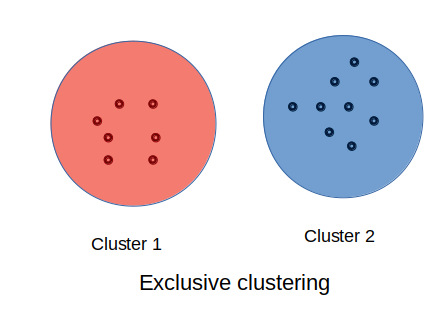

#### overlapping- 
This type of clustering is also called soft cluster.

In overlapping cluster as the name itself suggests that the two clusters overlap each other.

example: C means clustering
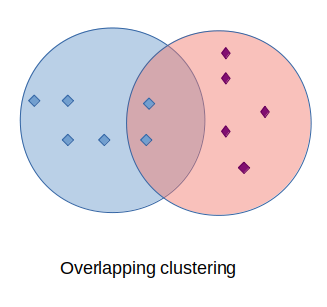

#### Hierarchical clustering-  
In hierarchical clustering, various clusters belong to some other parent cluster.
In the following diagram we can see that "A" and "B" belong to same cluster. But this cluster is a part of cluster "E" . And both the cluster "E" and "F" belong to cluster "G".

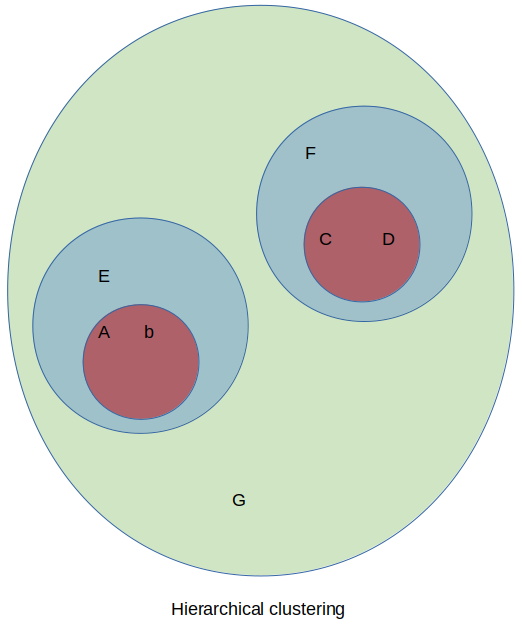

## Step included?

1. Select the number of clusters(K) to be identified. 
2. Randomely select K distint data points, which we are assuming to be centroid of three clusters.
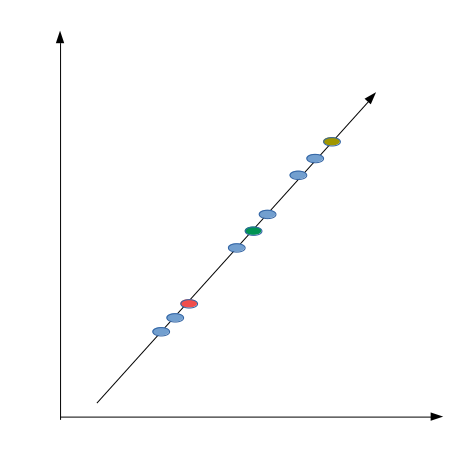
3. Measure the distance between first point and selected centroids.
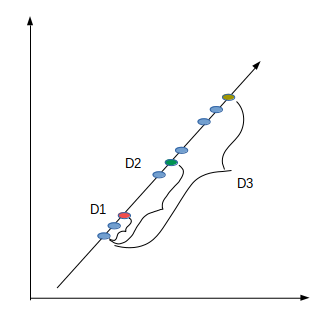
4. Add the first point to the closest centroid. In the given case first point will be assigned to red centroid.
5. Calculate the mean value of first point and red centroid and consider it as new centroid.
6. Calculate the distances between second point and all the centroids.
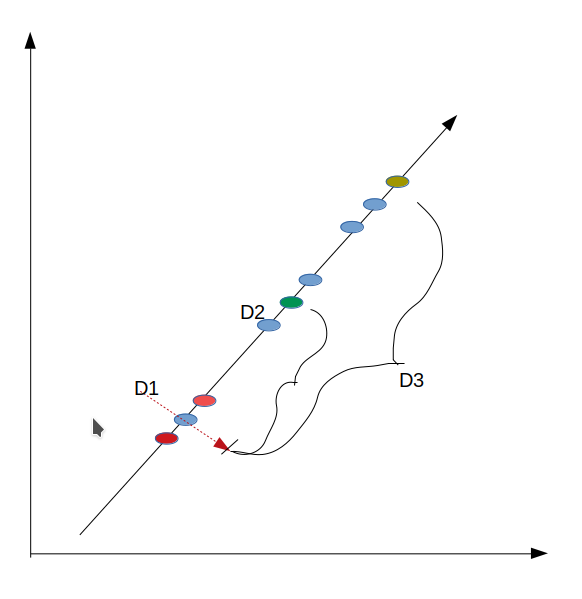
7. This process will go on untill all the pints are assigned to some cluster.
8. The algorithm keeps track of the variance of each cluster. So it repeates the above process and finds the best clusters. In this case we get same cluster for consecutive steps.

## How to set the value of K?
Sometimes it can be observed by looking at the data but this is a rare case and is not reliabel.
One method to set the value of K is hit and try method. In this method we set various values of K and check which one gives the best results. 
To check which K gives the best results we plot graph between variance and K. The point at which variance stops decresing and givesa elbow shape, is to be considered the best fit of K.

centroid:  [[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


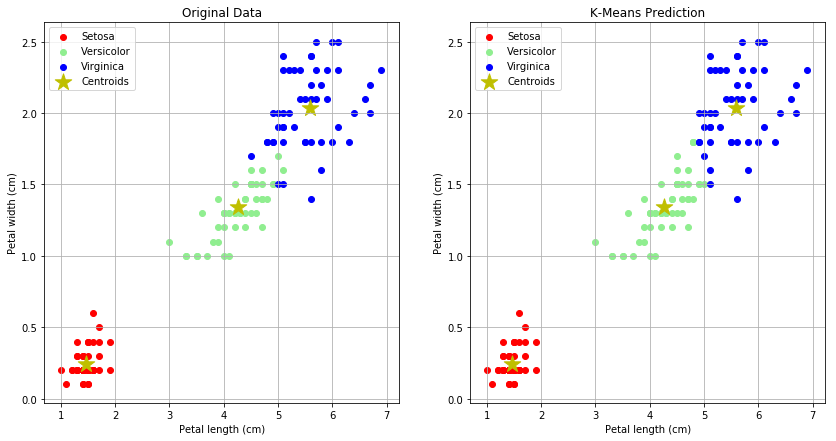

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

# create dataframe
dfIris = pd.DataFrame(
    iris['data'],
    columns = ['sepalL', 'sepalW', 'petalL', 'petalW']
)
dfIris['target'] = iris['target']
dfIris['jenis'] = dfIris['target'].apply(
    lambda x: iris['target_names'][x]
)

# split dataset: dfSetosa, dfVersicolor, dfVirginica
dfSetosa = dfIris[dfIris['jenis'] == 'setosa']
dfVersicolor = dfIris[dfIris['jenis'] == 'versicolor']
dfVirginica = dfIris[dfIris['jenis'] == 'virginica']



# kmeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state=0)

# training
model.fit(dfIris[['petalL', 'petalW']])

# prediction
prediksi = model.predict(dfIris[['petalL', 'petalW']])
dfIris['prediksi'] = prediksi

# split dataset: dfSetosaP, dfVersicolorP, dfVirginicaP
dfSetosaP = dfIris[dfIris['prediksi'] == 0]
dfVersicolorP = dfIris[dfIris['prediksi'] == 2]
dfVirginicaP = dfIris[dfIris['prediksi'] == 1]

# centroids
centroid = model.cluster_centers_
print("centroid: ", centroid)

# plot original vs k-means prediction
plt.figure('K-Means', figsize = (14,7))

# plot petal length vs petal width (original)
plt.subplot(121)
plt.scatter(
    dfSetosa['petalL'],
    dfSetosa['petalW'],
    color = 'r'
)
plt.scatter(
    dfVersicolor['petalL'],
    dfVersicolor['petalW'],
    color = 'lightgreen'
)
plt.scatter(
    dfVirginica['petalL'],
    dfVirginica['petalW'],
    color = 'b'
)

# plot centroids
plt.scatter(
    centroid[:,0],
    centroid[:,1],
    marker = '*',
    color = 'y',
    s = 300
)

plt.legend(['Setosa', 'Versicolor', 'Virginica', 'Centroids'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Original Data')
plt.grid(True)

# plot petal length vs petal width (prediction)
plt.subplot(122)
plt.scatter(
    dfSetosaP['petalL'],
    dfSetosaP['petalW'],
    color = 'r'
)
plt.scatter(
    dfVersicolorP['petalL'],
    dfVersicolorP['petalW'],
    color = 'lightgreen'
)
plt.scatter(
    dfVirginicaP['petalL'],
    dfVirginicaP['petalW'],
    color = 'b'
)

# plot centroids
plt.scatter(
    centroid[:,0],
    centroid[:,1],
    marker = '*',
    color = 'y',
    s = 300
)

plt.legend(['Setosa', 'Versicolor', 'Virginica', 'Centroids'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Means Prediction')
plt.grid(True)

plt.show()